In [1]:
## IMPORTAMOS LIBRERIAS A USAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Realizaremos el análisis exploratorio de varios conjuntos de datos que hemos obtenido de ENACOM (Ente Nacional de Telecomunicaciones en Argentina), la cual es una empresa prestadora de servicios de telecomunicaciones. 

1. LECTURA DE DATOS

In [122]:

df = pd.read_csv(r'C:\Users\Rossella\Escritorio\PROYECTO DA\Acceso a internet fijo por tecnología\Internet_Accesos-por-tecnologia_provincia.csv')
df.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [123]:
## Observo los datos para saber el tipo de datos y saber el numero de filas y columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [120]:
missing_values = df['Provincia'].isnull().sum()
missing_values = df['Trimestre'].isnull().sum()
missing_values = df['Año'].isnull().sum()
print("Valores faltantes en 'Provincia':", missing_values)
print("Valores faltantes en 'Trimestre':", missing_values)
print("Valores faltantes en 'Año':", missing_values)

Valores faltantes en 'Provincia': 0
Valores faltantes en 'Trimestre': 0
Valores faltantes en 'Año': 0


In [125]:
df['Año'].isnull


<bound method Series.isnull of 0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
836    2014
837    2014
838    2014
839    2014
840       *
Name: Año, Length: 841, dtype: object>

In [126]:
df = df.drop(840)


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           840 non-null    object 
 1   Trimestre     840 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.2+ KB


In [128]:
## Comenzamos con el cambio de tipo de dato de año y vemos si tienen caracteres no numéricos y lo seliminamos.
df['Año'] = df['Año'].astype(str).str.replace(r'\D', '', regex=True)
df['Trimestre'] = df['Trimestre'].astype(str).str.replace(r'\D', '', regex=True)

In [129]:
# Convertimos a números y rellenar NaN con un valor predeterminado
df['Año'] = pd.to_numeric(df['Año'], errors='coerce').fillna(0).astype(int)
df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').fillna(0).astype(int)

In [130]:
# Lista de columnas numéricas que deseas corregir
columnas_numericas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless','Otros','Total']

# Corregir los formatos incorrectos en las columnas numéricas
for columna in columnas_numericas:
    df[columna] = df[columna].astype(str).apply(lambda x: x.replace('.', '')).astype(float)
    df[columna] = df[columna].fillna(0).astype(int)

In [131]:
## Corroboramos que se hayan realizado los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    int32 
 1   Trimestre     840 non-null    int32 
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    int32 
 4   Cablemodem    840 non-null    int32 
 5   Fibra óptica  840 non-null    int32 
 6   Wireless      840 non-null    int32 
 7   Otros         840 non-null    int32 
 8   Total         840 non-null    int32 
dtypes: int32(8), object(1)
memory usage: 32.9+ KB


In [132]:
df.head(6)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778
5,2022,3,Córdoba,163770,465461,338570,6107,9797,1038668


In [133]:
## podemos así ver si hay algún nombre mal escrito y si hay vacíos.
df['Provincia'].value_counts()

Buenos Aires           35
Capital Federal        35
Tierra Del Fuego       35
Santiago Del Estero    35
Santa Fe               35
Santa Cruz             35
San Luis               35
San Juan               35
Salta                  35
Río Negro              35
Neuquén                35
Misiones               35
Mendoza                35
La Rioja               35
La Pampa               35
Jujuy                  35
Formosa                35
Entre Ríos             35
Corrientes             35
Córdoba                35
Chubut                 35
Chaco                  35
Catamarca              35
Tucumán                35
Name: Provincia, dtype: int64

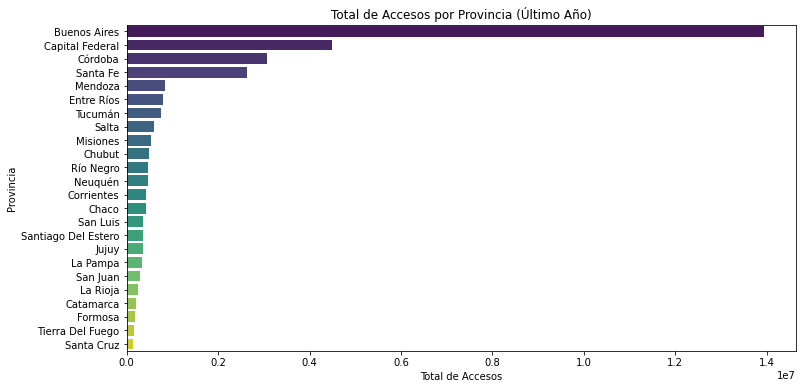

In [134]:

# Obtener el último año en tus datos
ultimo_anio = df['Año'].max()

# Filtrar los datos solo para el último año
datos_ultimo_anio = df[df['Año'] == ultimo_anio]

# Calcular el total de accesos por provincia para el último año
total_accesos_ultimo_anio = datos_ultimo_anio.groupby('Provincia')['Total'].sum().reset_index()

# Ordenar las provincias por el total de accesos de mayor a menor en el último año
total_accesos_ultimo_anio = total_accesos_ultimo_anio.sort_values('Total', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=total_accesos_ultimo_anio, x='Total', y='Provincia', palette='viridis')

# Personalizar la apariencia del gráfico
plt.xlabel('Total de Accesos')
plt.ylabel('Provincia')
plt.title('Total de Accesos por Provincia (Último Año)')

plt.show()

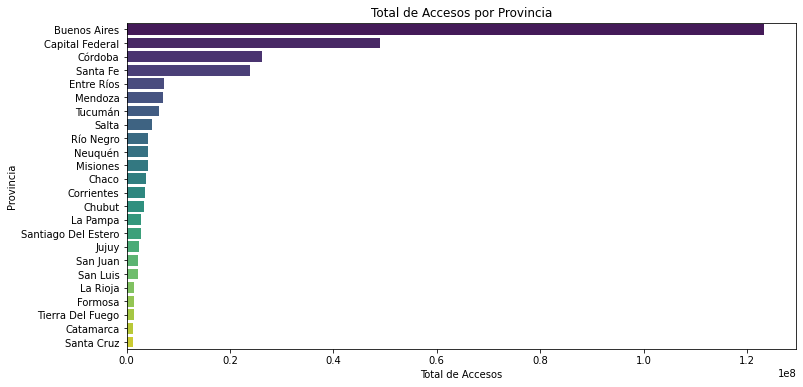

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el total de accesos por provincia
total_accesos = df.groupby('Provincia')['Total'].sum().reset_index()

# Ordenar las provincias por el total de accesos de mayor a menor
total_accesos = total_accesos.sort_values('Total', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=total_accesos, x='Total', y='Provincia', palette='viridis')

# Personalizar la apariencia del gráfico
plt.xlabel('Total de Accesos')
plt.ylabel('Provincia')
plt.title('Total de Accesos por Provincia')

plt.show()


In [136]:
## Hacemos un estudio estadístico primario de los datos

df.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,840.000000,840.000000,8.400000e+02,8.400000e+02,8.400000e+02,840.000000,840.000000,8.400000e+02
mean,2017.885714,2.457143,1.275668e+05,1.717750e+05,2.991186e+04,9937.419048,6603.879762,3.457417e+05
std,2.528745,1.105009,2.550543e+05,4.221661e+05,1.235013e+05,17564.217475,10132.970568,7.419436e+05
min,2014.000000,1.000000,6.842000e+03,0.000000e+00,0.000000e+00,0.000000,13.000000,1.255700e+04
25%,2016.000000,1.000000,2.247925e+04,8.599750e+03,1.860000e+02,1158.500000,772.500000,5.202975e+04
50%,2018.000000,2.000000,4.859600e+04,3.498400e+04,1.093000e+03,4262.000000,2734.500000,1.034895e+05
75%,2020.000000,3.000000,1.045695e+05,7.074850e+04,1.386250e+04,11333.500000,7546.500000,1.779148e+05
max,2022.000000,4.000000,1.586343e+06,2.748325e+06,1.436433e+06,126887.000000,73415.000000,4.721668e+06


#### Vemos que la media más alta la tiene  Cablemodem seguido de  ADSL y luego le sigue Fibra óptica 
#### Vemos en los valore mínimos de todos son valor cero, lo que nos indica que tenemos valores cero en estas columnas.

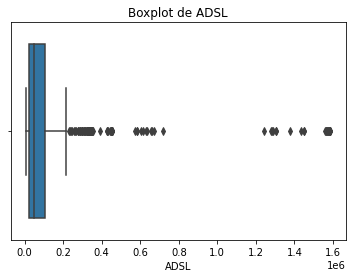

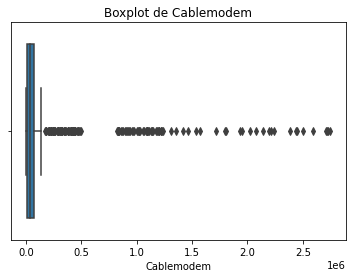

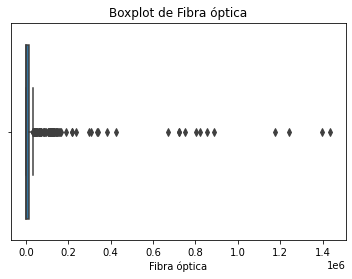

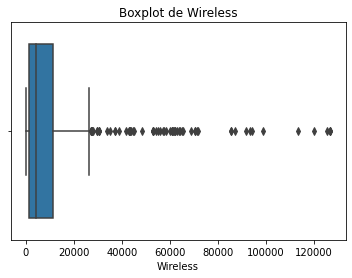

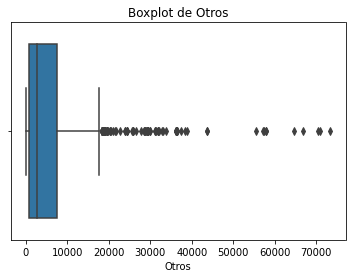

In [137]:
## Hago un análisis de posibles outliers con los gráficos de caja

import seaborn as sns

# Boxplot para ADSL
sns.boxplot(x=df['ADSL'])
plt.xlabel('ADSL')
plt.title('Boxplot de ADSL')
plt.show()

# Boxplot para Cablemodem
sns.boxplot(x=df['Cablemodem'])
plt.xlabel('Cablemodem')
plt.title('Boxplot de Cablemodem')
plt.show()

# Boxplot para Fibra óptica
sns.boxplot(x=df['Fibra óptica'])
plt.xlabel('Fibra óptica')
plt.title('Boxplot de Fibra óptica')
plt.show()

# Boxplot para Wireless
sns.boxplot(x=df['Wireless'])
plt.xlabel('Wireless')
plt.title('Boxplot de Wireless')
plt.show()

# Boxplot para Otros
sns.boxplot(x=df['Otros'])
plt.xlabel('Otros')
plt.title('Boxplot de Otros')
plt.show()


#### Vemos en el gráfico de cajas que los distintas variables tienen algunos valore atípicos, pero podría ser también las diferencias de las tecnologías en las distintas provincias, tanto por zonas donde aún algunas de las mismas no pueden ser usadas y aumentan de número las otras , así commo la preferencias del cliente en algunos por calidad y en otros por economía. 

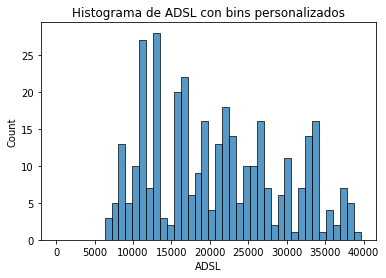

In [138]:
## Hacemos un histograma de cada una de las tecnologías
sns.histplot(data=df, x= 'ADSL', bins= np.arange(0, 40000, 900))
plt.xlabel('ADSL')
plt.title('Histograma de ADSL con bins personalizados')
plt.show()

#### En el histograma vemos que tenemos una gran cantidad de picos, lo que nos puede estar indicando que los datos se dividen en diferentes grupos

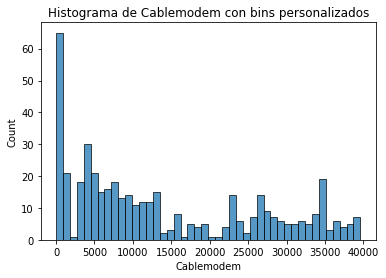

In [139]:
sns.histplot(data=df, x= 'Cablemodem', bins= np.arange(0, 40000, 900))
plt.xlabel('Cablemodem')
plt.title('Histograma de Cablemodem con bins personalizados')
plt.show()

#### Tiene un gran pico al inicio , ya que como confirmaremos tiene varios valores cero, luego tiene un sesgo hacia la derecha

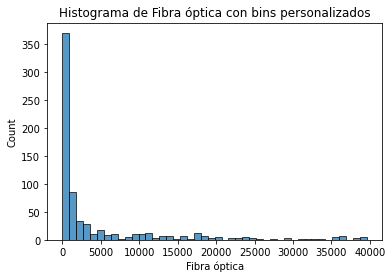

In [140]:
sns.histplot(data=df, x= 'Fibra óptica', bins= np.arange(0, 40000, 900))
plt.xlabel('Fibra óptica')
plt.title('Histograma de Fibra óptica con bins personalizados')
plt.show()

#### En los valore de FibraOptica vemos un gran número de ceros con un gran pico y luego un sesgo hacia la derecha, nos indica que los valores altos ocurren con baja frecuencia.

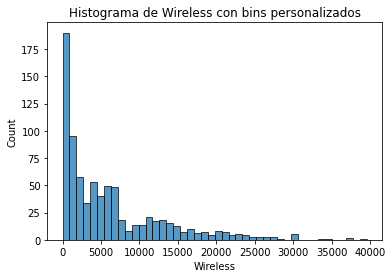

In [141]:
sns.histplot(data=df, x= 'Wireless', bins= np.arange(0, 40000, 900))
plt.xlabel('Wireless')
plt.title('Histograma de Wireless con bins personalizados')
plt.show()

## Este histograma también tiene un gran pico y un sesgo hacia la derecha.

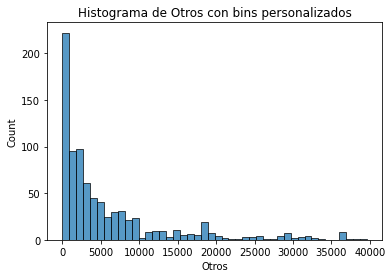

In [142]:
sns.histplot(data=df, x= 'Otros', bins= np.arange(0, 40000, 900))
plt.xlabel('Otros')
plt.title('Histograma de Otros con bins personalizados')
plt.show()

#### También observamos un gran pico y un sesgo hacia la derecha

In [145]:
df[df['Cablemodem'] == 0]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
515,2017,2,La Rioja,16244,0,15,20,280,16289
539,2017,1,La Rioja,16180,0,15,20,280,16225
563,2016,4,La Rioja,16270,0,16,20,280,16316
587,2016,3,La Rioja,16891,0,15,20,220,16930
611,2016,2,La Rioja,16691,0,15,20,280,16736
635,2016,1,La Rioja,16645,0,16,20,280,16691
659,2015,4,La Rioja,16886,0,16,20,280,16932
683,2015,3,La Rioja,16725,0,16,20,280,16771
707,2015,2,La Rioja,16463,0,16,20,280,16509
731,2015,1,La Rioja,16282,0,16,20,330,16333


In [146]:
df[df['Fibra óptica'] == 0]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
214,2020,3,Tierra Del Fuego,12854,26491,0,0,3100,39655
238,2020,2,Tierra Del Fuego,12854,26025,0,0,3100,39189
251,2020,1,La Rioja,13076,34984,0,2510,290,48340
262,2020,1,Tierra Del Fuego,12854,25632,0,0,3080,38794
275,2019,4,La Rioja,13738,34984,0,2510,290,49002
286,2019,4,Tierra Del Fuego,13261,26821,0,0,3100,40392
776,2014,3,Formosa,21021,4836,0,0,800,25937
800,2014,2,Formosa,20894,4628,0,0,780,25600
824,2014,1,Formosa,20774,4548,0,0,1000,25422


In [147]:
df[df['Wireless'] == 0]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
166,2021,1,Tierra Del Fuego,12853,27247,6,0,3160,40422
190,2020,4,Tierra Del Fuego,12853,26439,6,0,3160,39614
214,2020,3,Tierra Del Fuego,12854,26491,0,0,3100,39655
238,2020,2,Tierra Del Fuego,12854,26025,0,0,3100,39189
262,2020,1,Tierra Del Fuego,12854,25632,0,0,3080,38794
286,2019,4,Tierra Del Fuego,13261,26821,0,0,3100,40392
310,2019,3,Tierra Del Fuego,19790,26659,651,0,1487,48587
334,2019,2,Tierra Del Fuego,19790,25527,651,0,1486,47454
338,2019,1,Catamarca,26912,4443,16,0,2251,33622
358,2019,1,Tierra Del Fuego,19789,23549,1623,0,1486,46447


#### Vemos todos los valores de cero de cada una de las tecnologías. En nuestro estudio estos valores de cero no los eliminaré, ya que nos interesa saber que tecnologías y en que provincia no se estaría usando, y poder valorar si es porque se está usando algo mejor, o aún en ciertas zonas no ha llegado por ejemplo la FibraOptica. Esto siempre y cuando los valores estén correctamente cargados.

In [148]:
df.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [149]:
## Filtro los datos para Buenos Aires y el año 2022
df_adsl = df[(df['Provincia'] == 'Buenos Aires') & (df['Año']== 2022)]


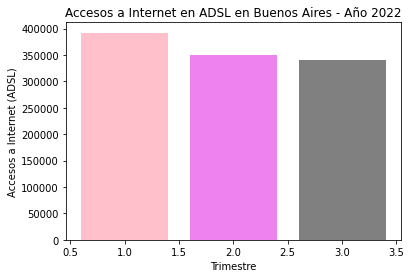

In [150]:
# Agrupo los datos por trimestre y calculo la suma de accesos de ADSL
grouped = df_adsl.groupby('Trimestre')['ADSL'].sum().reset_index()

## Cambio de colores
colores = ['pink','violet','grey']
# Creo la gráfica de barras
plt.bar(grouped['Trimestre'], grouped['ADSL'], color = colores)

# Configuro los ejes y el título
plt.xlabel('Trimestre')
plt.ylabel('Accesos a Internet (ADSL)')
plt.title('Accesos a Internet en ADSL en Buenos Aires - Año 2022')

# Muestro la gráfica
plt.show()

#### Filtramos por alguna provincia y los trimestres del año 2022 para ver los cambios en el tiempo, vemos que ha bajado el acceso a internet en el tercer trimestre. 

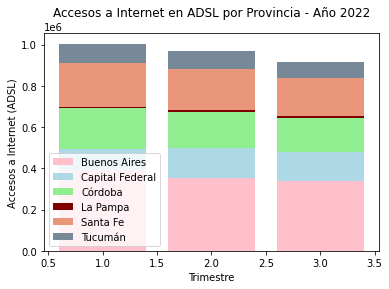

In [151]:
# Filtro los datos para las provincias de interés y el año 2022
provincias_interes = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'La Pampa', 'Santa Fe', 'Tucumán']
df_adsl_provincias = df[(df['Provincia'].isin(provincias_interes)) & (df['Año'] == 2022)]

# Agrupo los datos por trimestre y calcula la suma de accesos de ADSL para cada provincia
grouped = df_adsl_provincias.groupby(['Trimestre', 'Provincia'])['ADSL'].sum().unstack().reset_index()

# Creo la gráfica de barras apiladas
trimestres = grouped['Trimestre']
bottom = np.zeros(len(trimestres))  # Valores iniciales para el apilamiento de las barras

# Selecciono colores claros para las barras
colores = ['pink', '#ADD8E6', '#90EE90', '#800000', '#E9967A', '#778899']

for i, provincia in enumerate(provincias_interes):
    plt.bar(trimestres, grouped[provincia], bottom=bottom, label=provincia, color=colores[i])
    bottom += grouped[provincia]  # Se actualizan los valores para el apilamiento de las barras

# Configuro los ejes y el título
plt.xlabel('Trimestre')
plt.ylabel('Accesos a Internet (ADSL)')
plt.title('Accesos a Internet en ADSL por Provincia - Año 2022')
plt.legend()

# Muestro la gráfica
plt.show()

#### Hice algunas comparaciones con otras provincias y vemos que Buenos Aires a pesar de haber disminuido en el tercer trimestre , igual sigue siendo el que tiene mayor cantidad de accesos a internet con adsl

In [152]:
pv = pd.pivot_table(df, index='Provincia', values=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], aggfunc='mean')
pv

,ADSL,Cablemodem,Fibra óptica,Otros,Wireless
Provincia,,,,,
Buenos Aires,1.158886e+06,1.830653e+06,436001.200000,35341.114286,58452.114286
Capital Federal,3.355057e+05,1.005593e+06,39391.942857,17981.571429,3298.371429
Catamarca,2.405651e+04,3.854371e+03,7924.828571,1419.142857,841.285714
Chaco,4.942143e+04,4.163506e+04,9816.942857,1059.428571,3516.485714
Chubut,4.664906e+04,2.198023e+04,2623.057143,8212.600000,14860.257143
Corrientes,5.208300e+04,4.232000e+04,2774.285714,2096.342857,2847.828571
Córdoba,3.060289e+05,3.496504e+05,61964.942857,8513.828571,22846.600000
Entre Ríos,9.786251e+04,8.096211e+04,8618.028571,6521.571429,12431.028571
Formosa,2.104443e+04,8.914571e+03,1658.628571,1143.714286,7124.514286


<Figure size 720x432 with 0 Axes>

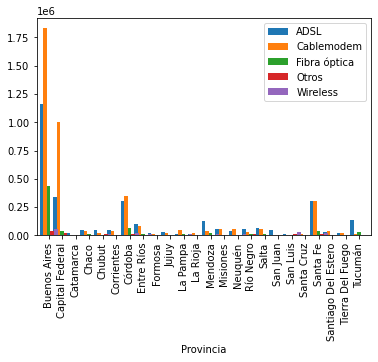

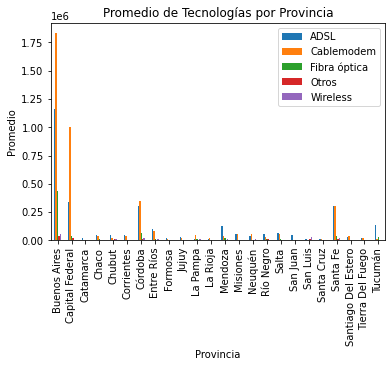

In [153]:
plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom=0.60)  # Ajusto el margen inferior para aumentar el espacio entre el gráfico y los ejes
pv.plot.bar(width=1.3)  # Ajusto el ancho de las barras 
pv.plot.bar()
# Personalizo la apariencia del gráfico
plt.title('Promedio de Tecnologías por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Promedio')
plt.show()


#### En este análisis de nuetro primer datasets, hemos visto que será importante identificar esos valores cero para poder ver en que zonas y que tipo de tecnología no se está usando. Para ello continuaremos con otros datasets para hacer un análisis más profundo y ver si hay columnas que se parecen en los datos a medida que vayamos avanzando en el análisis.

In [155]:
df.to_csv('Internet_tecnologia_provincias.csv')

### Análisis del segundo csv, el cual no usaremos en nuestro análisis en el dashboard poque al analizarlo vemos que hay gran cantidad de valores cero y una información que ya tenemos de manera más global por provincias en el anterior csv.

In [33]:
df.head(1)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,30,Buenos Aires,339648,2748325,1436433,126846,70416,4721668


In [284]:
df1 = pd.read_csv('Internet_fijo-Accesos-tecnologia-localidad.csv')

In [285]:
df1.head(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [286]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [291]:
# Lista de columnas numéricas que deseas corregir
columnas_numericas = ['ADSL', 'CABLEMODEM', 'DIAL UP','FIBRA OPTICA', 'OTROS','SATELITAL','WIMAX','WIRELESS','Total general']

# Corregir los formatos incorrectos en las columnas numéricas
for columna in columnas_numericas:
    df1[columna] = df1[columna].astype(str).apply(lambda x: x.replace('.', '')if x != '- 0' else '0').astype(float)
    df1[columna] = df1[columna].fillna(0).astype(int)

In [290]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   int32  
 5   CABLEMODEM     3142 non-null   int32  
 6   DIAL UP        3142 non-null   int32  
 7   FIBRA OPTICA   3142 non-null   int32  
 8   OTROS          3142 non-null   int32  
 9   SATELITAL      3142 non-null   int32  
 10  WIMAX          3142 non-null   int32  
 11  WIRELESS       3142 non-null   int32  
 12  Total general  3142 non-null   int32  
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), int32(9), object(4)
memory usage: 233.3+ KB


In [292]:
# Obtén el nombre de la columna por su índice
indice_columna = df1.columns[13]

# Eliminar la columna por índice
df1 = df1.drop(columns=[indice_columna])

In [293]:
df1.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03
mean,444.072884,1.919787e+03,3.958307,913.921388,69.207193,1.030236,0.670592,177.310630,3.529958e+03
std,3247.312984,2.368834e+04,44.704276,6213.194911,881.659067,17.535193,14.883203,685.352342,3.155495e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.225000e+01
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.510000e+02
75%,113.750000,9.000000e+00,0.000000,57.750000,0.000000,1.000000,0.000000,113.000000,9.822500e+02
max,140791.000000,1.240125e+06,2145.000000,208950.000000,29585.000000,975.000000,444.000000,18447.000000,1.547679e+06


#### En este caso vemos como cambian las medias , estando en primer lugar el cablemodem, luego fibra óptica y le sigue adsl.

In [294]:
df1.head(1)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7218


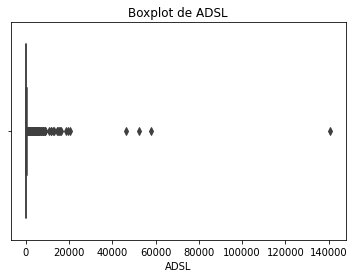

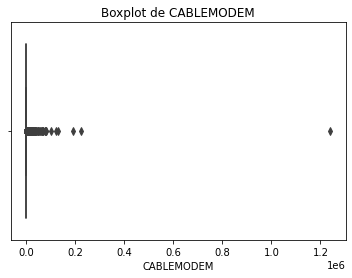

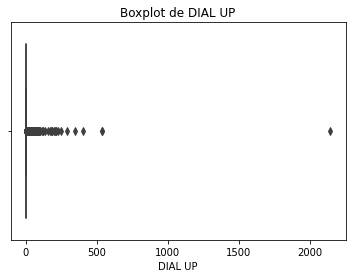

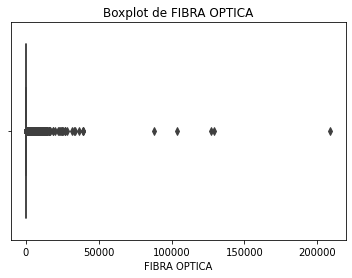

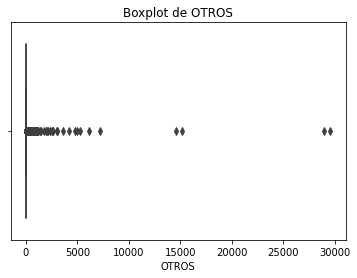

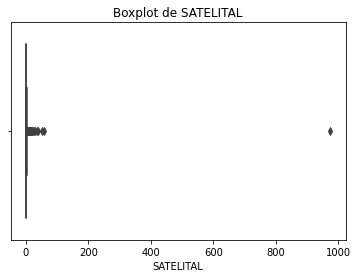

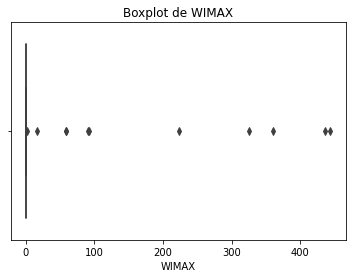

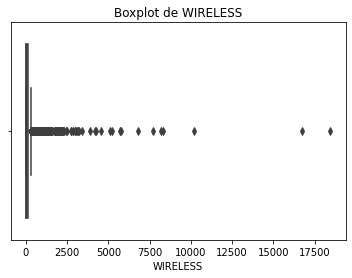

In [295]:
import seaborn as sns

# Boxplot para ADSL
sns.boxplot(x=df1['ADSL'])
plt.xlabel('ADSL')
plt.title('Boxplot de ADSL')
plt.show()

# Boxplot para CABLEMODEM
sns.boxplot(x=df1['CABLEMODEM'])
plt.xlabel('CABLEMODEM')
plt.title('Boxplot de CABLEMODEM')
plt.show()

# Boxplot para DUAL UP
sns.boxplot(x=df1['DIAL UP'])
plt.xlabel('DIAL UP')
plt.title('Boxplot de DIAL UP')
plt.show()

# Boxplot para FIBRA OPTICA
sns.boxplot(x=df1['FIBRA OPTICA'])
plt.xlabel('FIBRA OPTICA')
plt.title('Boxplot de FIBRA OPTICA')
plt.show()
# Boxplot para OTROS
sns.boxplot(x=df1['OTROS'])
plt.xlabel('OTROS')
plt.title('Boxplot de OTROS')
plt.show()

# Boxplot para SATELITAL
sns.boxplot(x=df1['SATELITAL'])
plt.xlabel('SATELITAL')
plt.title('Boxplot de SATELITAL')
plt.show()

# Boxplot para WIMAX
sns.boxplot(x=df1['WIMAX'])
plt.xlabel('WIMAX')
plt.title('Boxplot de WIMAX')
plt.show()

# Boxplot para WIRELESS
sns.boxplot(x=df1['WIRELESS'])
plt.xlabel('WIRELESS')
plt.title('Boxplot de WIRELESS')
plt.show()

#### En este caso tenemos una gráficas de cajas con no tanta información, ya que los valores están más dispersos, hay muchos ceros, ya que es más amplio el estudio dentro de las provincias, tenemos en cuenta el Partido y las localidades dentro de él. 

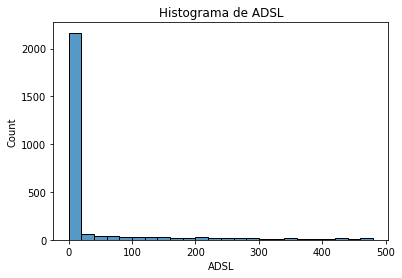

In [313]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'ADSL', bins= np.arange(0,500,20))
plt.xlabel('ADSL')
plt.title('Histograma de ADSL')
plt.show()

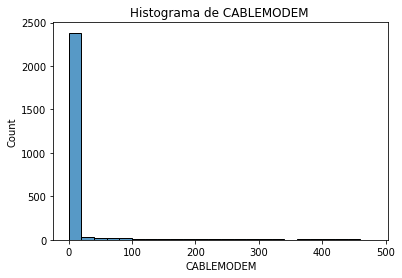

In [312]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'CABLEMODEM', bins= np.arange(0,500,20))
plt.xlabel('CABLEMODEM')
plt.title('Histograma de CABLEMODEM ')
plt.show()

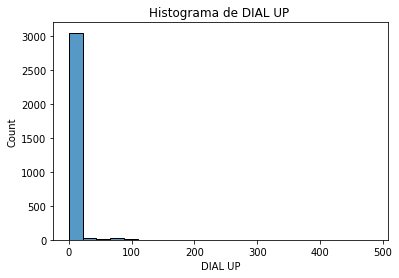

In [307]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'DIAL UP', bins= np.arange(0,500,20))
plt.xlabel('DIAL UP')
plt.title('Histograma de DIAL UP ')
plt.show()

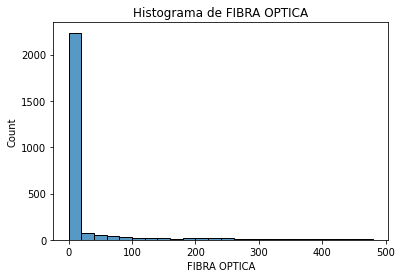

In [311]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'FIBRA OPTICA', bins= np.arange(0,500,20))
plt.xlabel('FIBRA OPTICA')
plt.title('Histograma de FIBRA OPTICA')
plt.show()

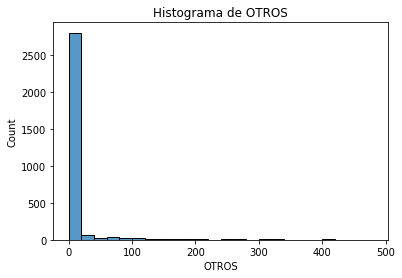

In [314]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'OTROS', bins= np.arange(0,500,20))
plt.xlabel('OTROS')
plt.title('Histograma de OTROS')
plt.show()

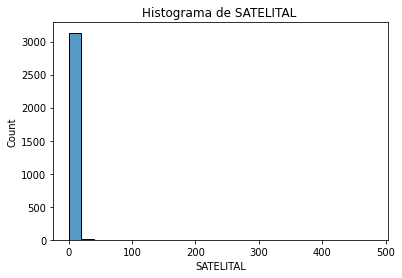

In [318]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'SATELITAL', bins= np.arange(0,500,20))
plt.xlabel('SATELITAL')
plt.title('Histograma de SATELITAL ')
plt.show()

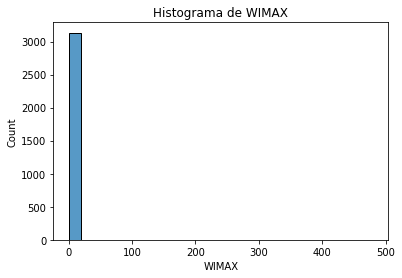

In [323]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'WIMAX', bins= np.arange(0,500,20))
plt.xlabel('WIMAX')
plt.title('Histograma de WIMAX')
plt.show()

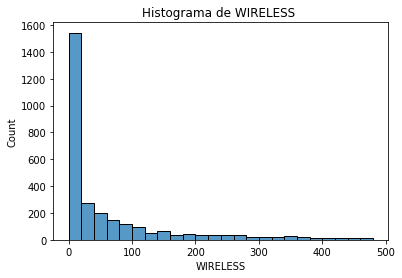

In [324]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df1, x= 'WIRELESS', bins= np.arange(0,500,20))
plt.xlabel('WIRELESS')
plt.title('Histograma de WIRELESS ')
plt.show()

#### Observando las medias, vemos que se relaciona con el histograma obtenido.

In [325]:
df1[df1['ADSL']== 0]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
7,BUENOS AIRES,9 de Julio,12 de Octubre,6588030,0,0,0,0,0,0,0,19,19
10,BUENOS AIRES,9 de Julio,Dudignac,6588040,0,0,1,0,0,0,0,463,464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,TUCUMAN,Tafí del Valle,Colalao del Valle,90098020,0,0,0,0,0,0,0,56,56
3131,TUCUMAN,Tafí del Valle,El Mollar,90098030,0,0,0,0,0,1,0,11,12
3136,TUCUMAN,Tafí Viejo,Diagonal Norte - Luz y Fuerza - Los Pocitos - ...,90105060,0,0,0,281,0,0,0,0,281
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,1,0,471,0,0,0,0,472


In [327]:
df1[df1['CABLEMODEM']== 0]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
5,BUENOS AIRES,25 de Mayo,Ernestina,6854030,66,0,0,0,0,0,0,0,66
6,BUENOS AIRES,25 de Mayo,Pedernales,6854070,568,0,0,0,0,0,0,7,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,TUCUMAN,Tafí Viejo,Barrio Mutual San Martín,90105030,23,0,0,0,0,0,0,0,23
3136,TUCUMAN,Tafí Viejo,Diagonal Norte - Luz y Fuerza - Los Pocitos - ...,90105060,0,0,0,281,0,0,0,0,281
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,0,0,0,33,0,0,99,282


In [328]:
df1[df1['DIAL UP']== 0]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,1,0,471,0,0,0,0,472
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,0,0,0,33,0,0,99,282
3140,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1725,0,0,0,1,0,0,97,1823


In [63]:
df1[df1['FIBRA OPTICA']== 0]

NameError: name 'df1' is not defined

In [330]:
df1[df1['SATELITAL']== 0]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
5,BUENOS AIRES,25 de Mayo,Ernestina,6854030,66,0,0,0,0,0,0,0,66
6,BUENOS AIRES,25 de Mayo,Pedernales,6854070,568,0,0,0,0,0,0,7,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,1,0,471,0,0,0,0,472
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,0,0,0,33,0,0,99,282
3140,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1725,0,0,0,1,0,0,97,1823


In [331]:
df1[df1['WIMAX']== 0]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,1,0,471,0,0,0,0,472
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,0,0,0,33,0,0,99,282
3140,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1725,0,0,0,1,0,0,97,1823


In [332]:
df1[df1['WIRELESS']== 0]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
5,BUENOS AIRES,25 de Mayo,Ernestina,6854030,66,0,0,0,0,0,0,0,66
9,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),6588010,450,0,0,0,60,0,0,0,510
11,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),6588060,199,0,0,2,2,0,0,0,203
13,BUENOS AIRES,9 de Julio,Patricios,6588110,76,0,0,0,0,0,0,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,TUCUMAN,Tafí Viejo,Barrio Lomas de Tafí,90105020,349,0,0,0,0,0,0,0,349
3134,TUCUMAN,Tafí Viejo,Barrio Mutual San Martín,90105030,23,0,0,0,0,0,0,0,23
3136,TUCUMAN,Tafí Viejo,Diagonal Norte - Luz y Fuerza - Los Pocitos - ...,90105060,0,0,0,281,0,0,0,0,281
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,1,0,471,0,0,0,0,472


In [335]:
pv1 = pd.pivot_table(df1, index=['Provincia','Partido','Localidad'], values=['ADSL', 'CABLEMODEM','DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 
                                                                            'WIMAX','WIRELESS'], aggfunc='mean')
pv1

ADSL  CABLEMODEM  \
Provincia    Partido        Localidad                                    
BUENOS AIRES 25 de Mayo     25 de Mayo                 873        4704   
                            Del Valle                  181           0   
                            Ernestina                   66           0   
                            Gobernador Ugarte            0           0   
                            Lucas Monteverde             0           0   
...                                                    ...         ...   
TUCUMAN      Tafí del Valle Tafí del Valle             168           0   
             Trancas        San Pedro de Colalao         0           0   
                            Villa  de Trancas          150           0   
             Yerba Buena    Villa Carmela             1725           0   
                            Yerba Buena - Marcos Paz   129         203   

                                                      DIAL UP  FIBRA OPTICA  \
Provincia    Partido        Localidad                                         
BUENOS AIRES 25 de Mayo     25 de Mayo                      0             2   
                            Del Valle                       0             0   
                            Ernestina                       0             0   
                            Gobernador Ugarte               0             0   
                            Lucas Monteverde                0             0   
...                                                       ...           ...   
TUCUMAN      Tafí del Valle Tafí del Valle                  0             0   
             Trancas        San Pedro de Colalao            0             0   
                            Villa  de Trancas               0             0   
             Yerba Buena    Villa Carmela                   0             0   
                            Yerba Buena - Marcos Paz        0         15511   

                                                      OTROS  SATELITAL  WIMAX  \
Provincia    Partido        Localidad                                           
BUENOS AIRES 25 de Mayo     25 de Mayo                    0        975      0   
                            Del Valle                    10          1      0   
                            Ernestina                     0          0      0   
                            Gobernador Ugarte             0          0      0   
                            Lucas Monteverde              0          0      0   
...                                                     ...        ...    ...   
TUCUMAN      Tafí del Valle Tafí del Valle                1          1      0   
             Trancas        San Pedro de Colalao          0          0      0   
                            Villa  de Trancas            33          0      0   
             Yerba Buena    Villa Carmela                 1          0      0   
                            Yerba Buena - Marcos Paz     33          0      0   

                                                      WIRELESS  
Provincia    Partido        Localidad                           
BUENOS AIRES 25 de Mayo     25 de Mayo                     664  
                            Del Valle                        0  
                            Ernestina                        0  
                            Gobernador Ugarte              181  
                            Lucas Monteverde                 6  
...                                                        ...  
TUCUMAN      Tafí del Valle Tafí del Valle                  35  
             Trancas        San Pedro de Colalao           313  
                            Villa  de Trancas               99  
             Yerba Buena    Villa Carmela                   97  
                            Yerba Buena - Marcos Paz         0  

[3142 rows x 8 columns]

In [15]:
pv1.head(10)

ADSL  \
Provincia    Partido    Localidad                                        
BUENOS AIRES 25 de Mayo 25 de Mayo                                 873   
                        Del Valle                                  181   
                        Ernestina                                   66   
                        Gobernador Ugarte                            0   
                        Lucas Monteverde                             0   
                        Norberto de la Riestra                       0   
                        Pedernales                                 568   
             9 de Julio 12 de Octubre                                0   
                        9 de Julio                                   4   
                        Alfredo Demarchi  (Est. Facundo Quiroga)   450   

                                                                  CABLEMODEM  \
Provincia    Partido    Localidad                                              
BUENOS AIRES 25 de Mayo 25 de Mayo                                         4   
                        Del Valle                                          0   
                        Ernestina                                          0   
                        Gobernador Ugarte                                  0   
                        Lucas Monteverde                                   0   
                        Norberto de la Riestra                           782   
                        Pedernales                                         0   
             9 de Julio 12 de Octubre                                      0   
                        9 de Julio                                         3   
                        Alfredo Demarchi  (Est. Facundo Quiroga)           0   

                                                                  DIAL UP  \
Provincia    Partido    Localidad                                           
BUENOS AIRES 25 de Mayo 25 de Mayo                                      0   
                        Del Valle                                       0   
                        Ernestina                                       0   
                        Gobernador Ugarte                               0   
                        Lucas Monteverde                                0   
                        Norberto de la Riestra                          0   
                        Pedernales                                      0   
             9 de Julio 12 de Octubre                                   0   
                        9 de Julio                                     82   
                        Alfredo Demarchi  (Est. Facundo Quiroga)        0   

                                                                  FIBRA OPTICA  \
Provincia    Partido    Localidad                                                
BUENOS AIRES 25 de Mayo 25 de Mayo                                           2   
                        Del Valle                                            0   
                        Ernestina                                            0   
                        Gobernador Ugarte                                    0   
                        Lucas Monteverde                                     0   
                        Norberto de la Riestra                               6   
                        Pedernales                                           0   
             9 de Julio 12 de Octubre                                        0   
                        9 de Julio                                           5   
                        Alfredo Demarchi  (Est. Facundo Quiroga)             0   

                                                                  OTROS  \
Provincia    Partido    Localidad                                         
BUENOS AIRES 25 de Mayo 25 de Mayo                                    0   
                        Del Valle                                    10   
      

### Análisis del tercer csv sobre acceso a Internet por tecnología y por trimestre.

In [34]:
## Leo el csv

df2 = pd.read_csv(r'C:\Users\Rossella\Escritorio\PROYECTO DA\Acceso a internet fijo por tecnología\Internet_Accesos-por-tecnologia_serie_trimestral.csv')

In [35]:
## Miramos las primeras filas para ver que ha subido correctamente
df2.head(5)

,Anio,Trimestre,ADSL,Cablemodem,Fibra Optica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [37]:
## Hacemos un info para ver el tipo de datos y las columnas y filas. 

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anio          35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra Optica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [38]:
## Debo cambiar el tipo de datos para poder hacer un mejor análisis
## Lista de columnas numéricas que deseo corregir
columnas_numericas = ['ADSL', 'Cablemodem', 'Fibra Optica', 'Wireless','Otros','Total']

# Corrjgo los formatos incorrectos en las columnas numéricas
for columna in columnas_numericas:
    df2[columna] = df2[columna].astype(str).apply(lambda x: x.replace('.', '')).astype(float)
    df2[columna] = df2[columna].fillna(0).astype(int)

In [39]:
## Confirmo que los cambios se han realizado correctamente.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Anio          35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int32 
 3   Cablemodem    35 non-null     int32 
 4   Fibra Optica  35 non-null     int32 
 5   Wireless      35 non-null     int32 
 6   Otros         35 non-null     int32 
 7   Total         35 non-null     int32 
 8   Periodo       35 non-null     object
dtypes: int32(6), int64(2), object(1)
memory usage: 1.8+ KB


In [41]:
df2.head(2)

,Anio,Trimestre,ADSL,Cablemodem,Fibra Optica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,55711,23523,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022


In [42]:
## Hago un rápido análisis estadístico de las variables numéricas
df2.describe()

,Anio,Trimestre,ADSL,Cablemodem,Fibra Optica,Wireless,Otros,Total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,224909.857143,123193.828571,8.297800e+06
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,177544.571827,96972.324891,1.399611e+06
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,1653.000000,543.000000,6.398398e+06
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,81766.000000,55934.000000,7.057455e+06
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,155775.000000,71573.000000,8.110444e+06
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,364500.000000,239312.500000,9.260442e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,2.871541e+06,556243.000000,265328.000000,1.109113e+07


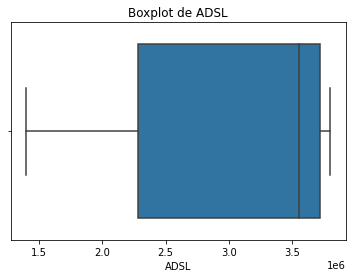

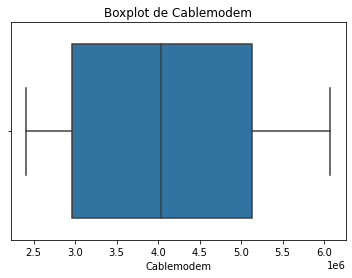

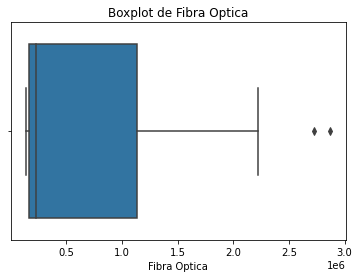

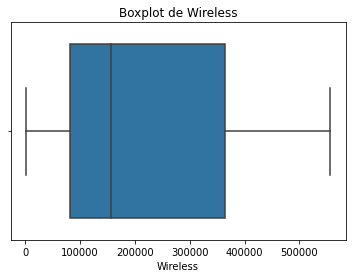

Text(0.5, 1.0, 'Boxplot de Otros')

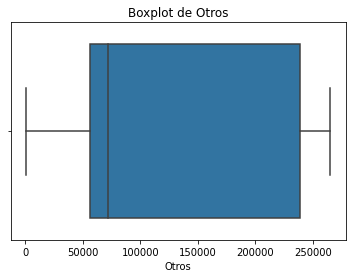

In [44]:
## Realizo el gráfico de cajas para ver posibles outliers

import seaborn as sns

# Boxplot para ADSL
sns.boxplot(x=df2['ADSL'])
plt.xlabel('ADSL')
plt.title('Boxplot de ADSL')
plt.show()

# Boxplot para Cablemodem
sns.boxplot(x=df2['Cablemodem'])
plt.xlabel('Cablemodem')
plt.title('Boxplot de Cablemodem')
plt.show()

# Boxplot para Fibra Optica
sns.boxplot(x=df2['Fibra Optica'])
plt.xlabel('Fibra Optica')
plt.title('Boxplot de Fibra Optica')
plt.show()

# Boxplot para Wireless
sns.boxplot(x=df2['Wireless'])
plt.xlabel('Wireless')
plt.title('Boxplot de Wireless')
plt.show()
# Boxplot para Otros
sns.boxplot(x=df2['Otros'])
plt.xlabel('Otros')
plt.title('Boxplot de Otros')

#### Aquí estamos viendo el resultado de trimestes,así como en la media y desviación standard.

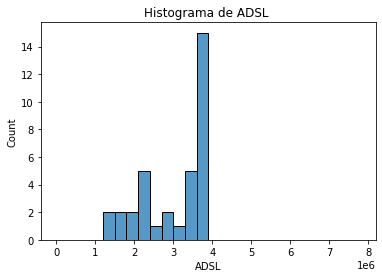

In [45]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df2, x= 'ADSL', bins= np.arange(0,8000000,300000))
plt.xlabel('ADSL')
plt.title('Histograma de ADSL ')
plt.show()

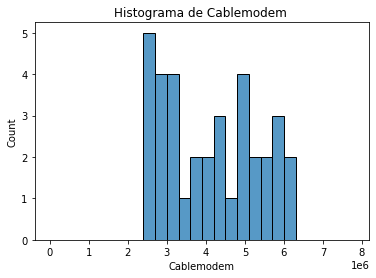

In [47]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df2, x= 'Cablemodem', bins= np.arange(0,8000000,300000))
plt.xlabel('Cablemodem')
plt.title('Histograma de Cablemodem ')
plt.show()

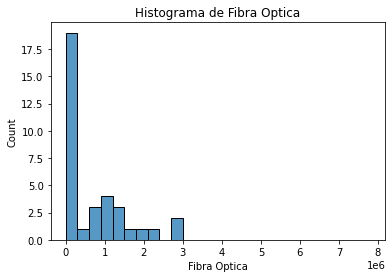

In [48]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df2, x= 'Fibra Optica', bins= np.arange(0,8000000,300000))
plt.xlabel('Fibra Optica')
plt.title('Histograma de Fibra Optica')
plt.show()

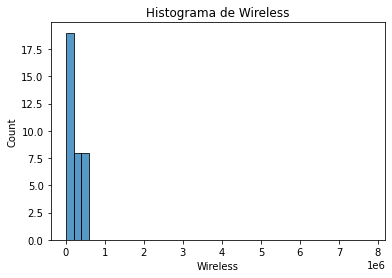

In [49]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df2, x= 'Wireless', bins= np.arange(0,8000000,200000))
plt.xlabel('Wireless')
plt.title('Histograma de Wireless')
plt.show()

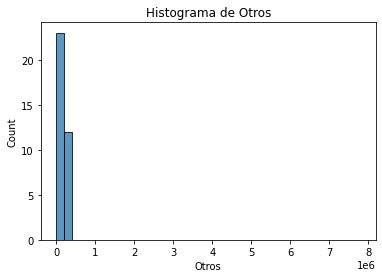

In [50]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df2, x= 'Otros', bins= np.arange(0,8000000,200000))
plt.xlabel('Otros')
plt.title('Histograma de Otros')
plt.show()

In [62]:
pv1 = pd.pivot_table(df2, index=['Trimestre','Periodo'], values=['ADSL', 'Cablemodem','Fibra Optica','Wireless','Otros','Total'], aggfunc='mean')
pv1

NameError: name 'df2' is not defined

<Figure size 720x432 with 0 Axes>

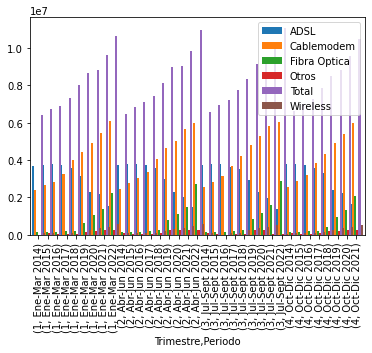

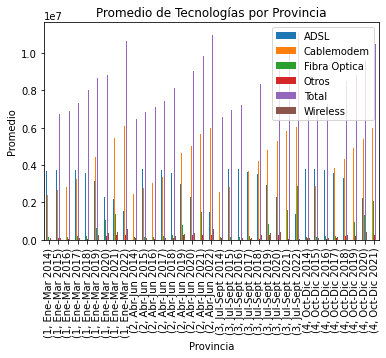

In [52]:
plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom=0.60)  # Ajusta el margen inferior para aumentar el espacio entre el gráfico y los ejes
pv1.plot.bar(width=1.3)  # Ajustar el ancho de las barras
pv1.plot.bar()
# Personalizo la apariencia del gráfico
plt.title('Promedio de Tecnologías por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Promedio')
plt.show()

<Figure size 720x432 with 0 Axes>

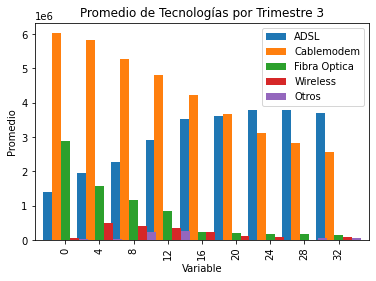

<Figure size 720x432 with 0 Axes>

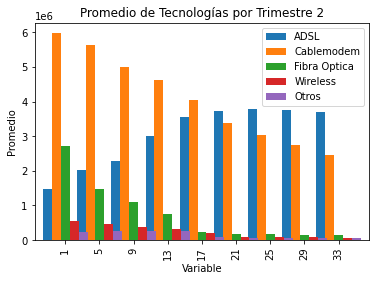

<Figure size 720x432 with 0 Axes>

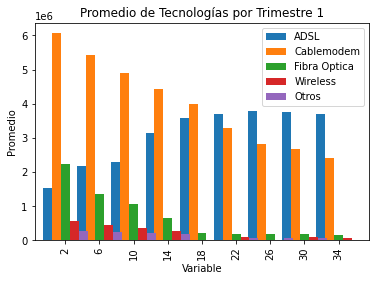

<Figure size 720x432 with 0 Axes>

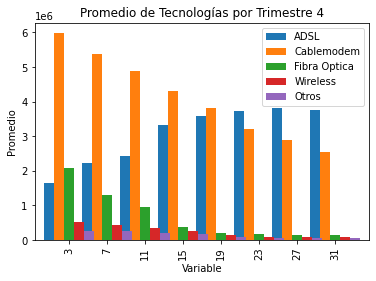

In [53]:
# Obtener una lista de los trimestres únicos
trimestres = df2['Trimestre'].unique()

# Crear un gráfico para cada trimestre
for trimestre in trimestres:
    plt.figure(figsize=(10, 6))
    plt.subplots_adjust(bottom=0.60)  # Ajustar el margen inferior para aumentar el espacio entre el gráfico y los ejes
    data_trimestre = df2[df2['Trimestre'] == trimestre]
    variables = ['ADSL', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']
    pv1_trimestre = data_trimestre[variables]
    pv1_trimestre.plot.bar(width=1.3)  # Ajustar el ancho de las barras
    plt.title(f'Promedio de Tecnologías por Trimestre {trimestre}')
    plt.xlabel('Variable')
    plt.ylabel('Promedio')
    plt.show()

<Figure size 720x432 with 0 Axes>

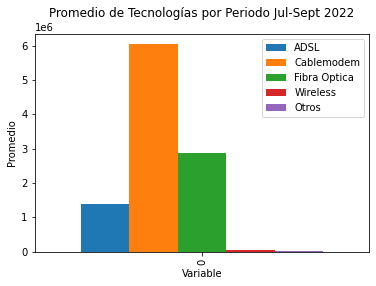

<Figure size 720x432 with 0 Axes>

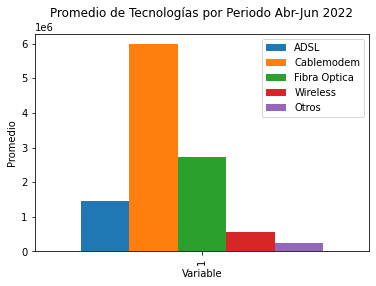

<Figure size 720x432 with 0 Axes>

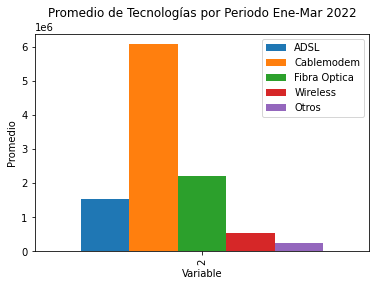

<Figure size 720x432 with 0 Axes>

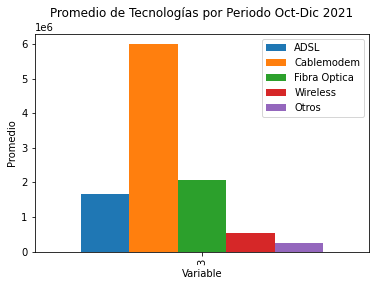

<Figure size 720x432 with 0 Axes>

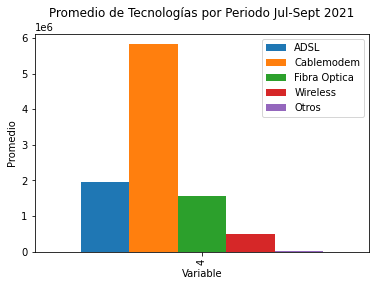

<Figure size 720x432 with 0 Axes>

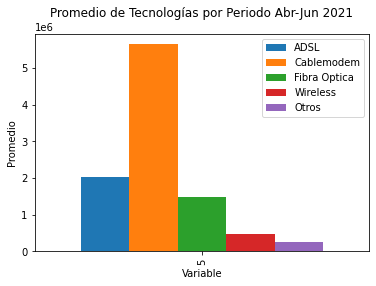

<Figure size 720x432 with 0 Axes>

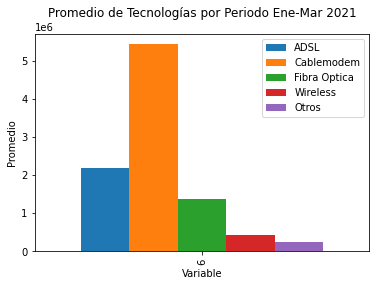

<Figure size 720x432 with 0 Axes>

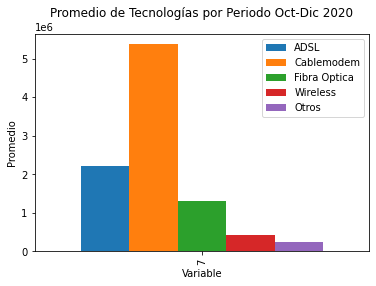

<Figure size 720x432 with 0 Axes>

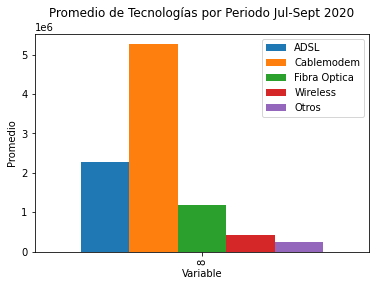

<Figure size 720x432 with 0 Axes>

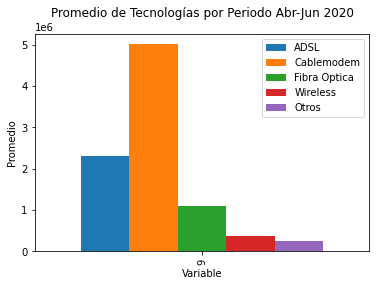

<Figure size 720x432 with 0 Axes>

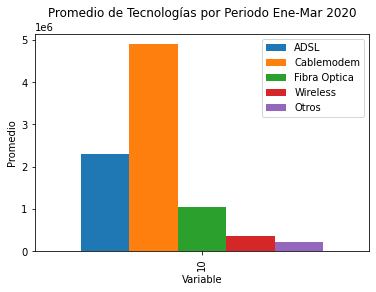

<Figure size 720x432 with 0 Axes>

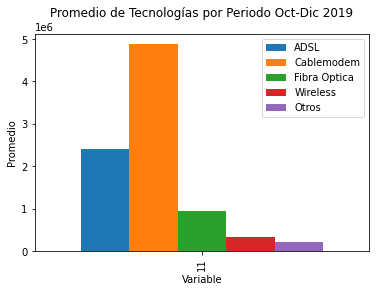

<Figure size 720x432 with 0 Axes>

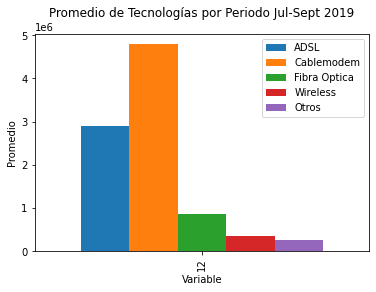

<Figure size 720x432 with 0 Axes>

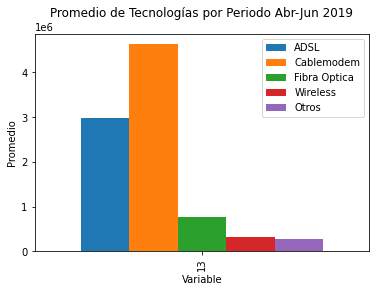

<Figure size 720x432 with 0 Axes>

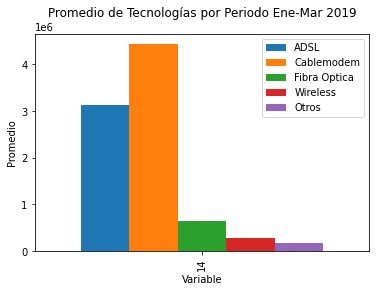

<Figure size 720x432 with 0 Axes>

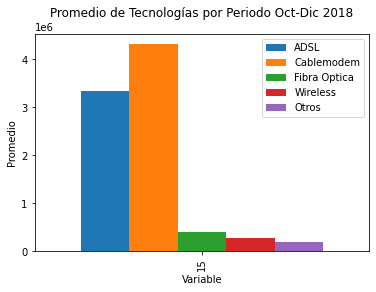

<Figure size 720x432 with 0 Axes>

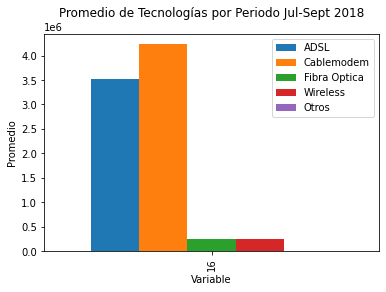

<Figure size 720x432 with 0 Axes>

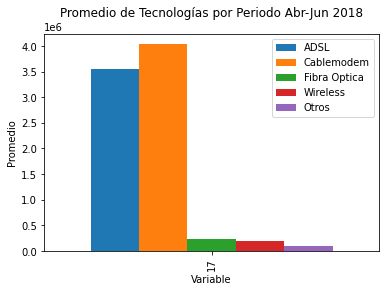

<Figure size 720x432 with 0 Axes>

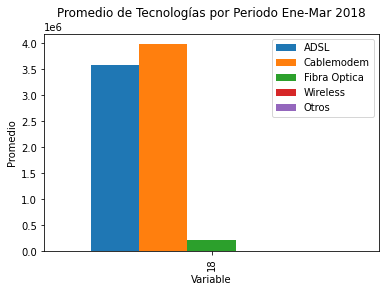

<Figure size 720x432 with 0 Axes>

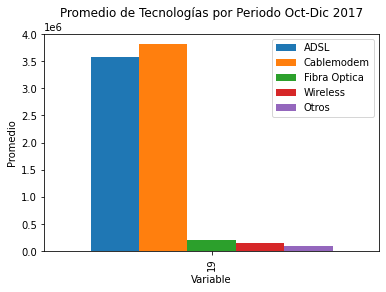

<Figure size 720x432 with 0 Axes>

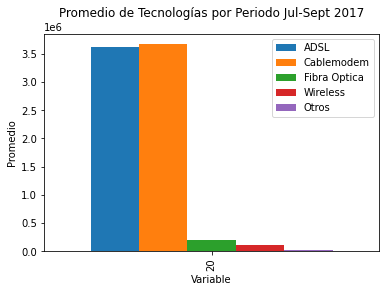

<Figure size 720x432 with 0 Axes>

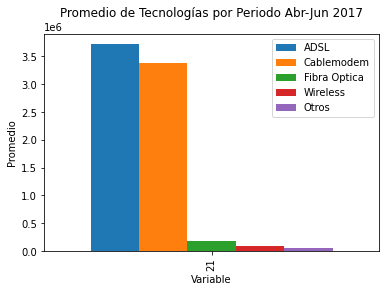

<Figure size 720x432 with 0 Axes>

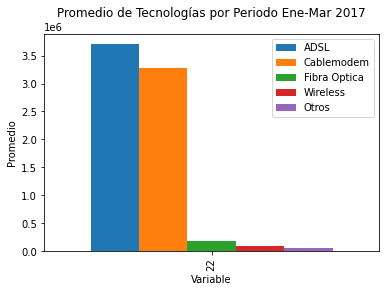

<Figure size 720x432 with 0 Axes>

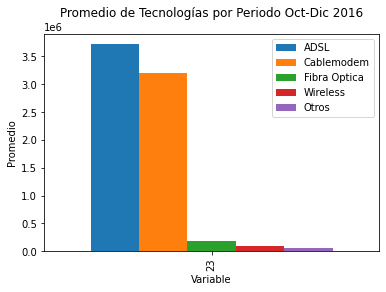

<Figure size 720x432 with 0 Axes>

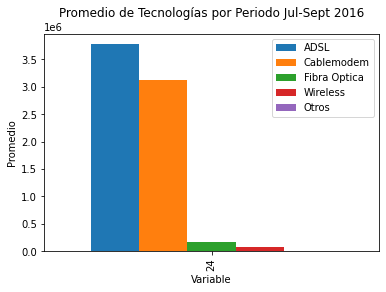

<Figure size 720x432 with 0 Axes>

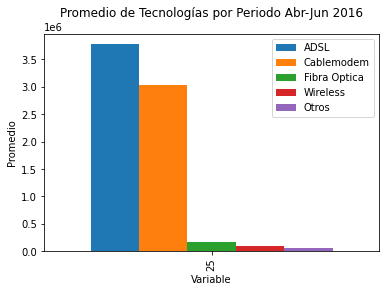

<Figure size 720x432 with 0 Axes>

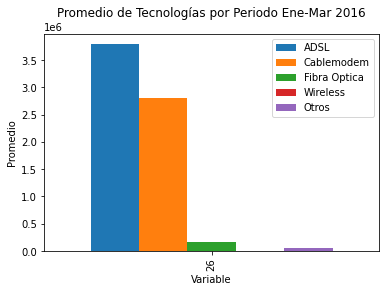

<Figure size 720x432 with 0 Axes>

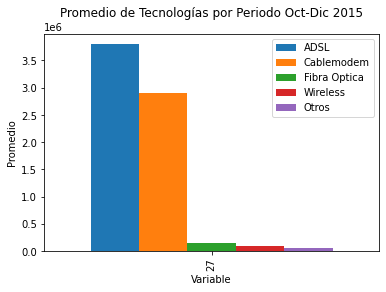

<Figure size 720x432 with 0 Axes>

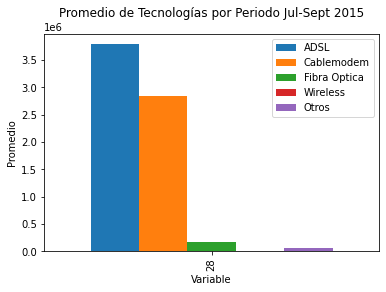

<Figure size 720x432 with 0 Axes>

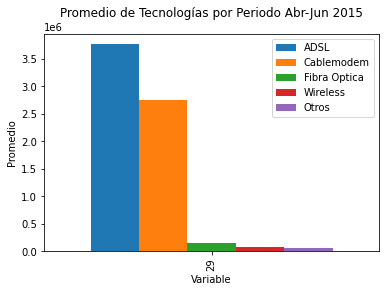

<Figure size 720x432 with 0 Axes>

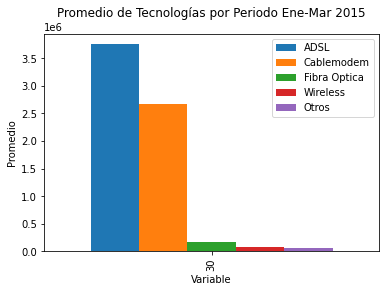

<Figure size 720x432 with 0 Axes>

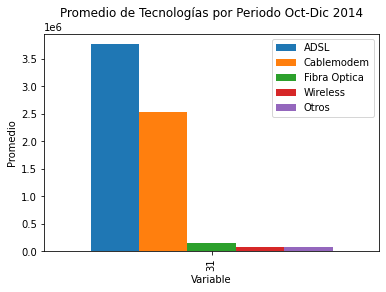

<Figure size 720x432 with 0 Axes>

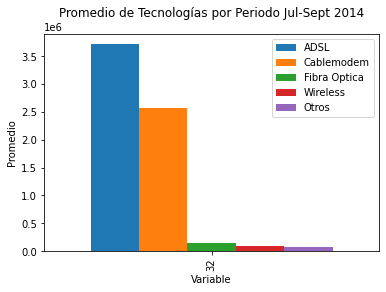

<Figure size 720x432 with 0 Axes>

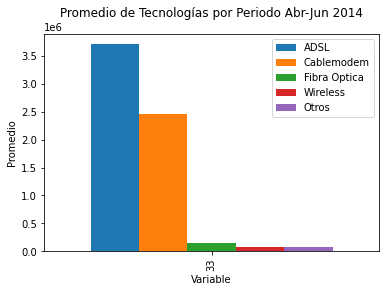

<Figure size 720x432 with 0 Axes>

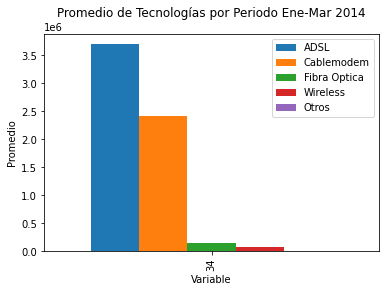

In [54]:
# Obtener una lista de los trimestres únicos
periodos = df2['Periodo'].unique()

# Crear un gráfico para cada trimestre
for periodo in periodos:
    plt.figure(figsize=(10, 6))
    plt.subplots_adjust(bottom=0.60)  # Ajustar el margen inferior para aumentar el espacio entre el gráfico y los ejes
    data_periodo = df2[df2['Periodo'] == periodo]
    variables = ['ADSL', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']
    pv1_periodo = data_periodo[variables]
    pv1_periodo.plot.bar(width=1.3)  # Ajustar el ancho de las barras
    plt.title(f'Promedio de Tecnologías por Periodo {periodo}')
    plt.xlabel('Variable')
    plt.ylabel('Promedio')
    plt.show()

#### podemos ver que con las gráficas de la tabla pivot, vemos los cambios en el tiempo por trimestre de los valores de las diferentes tecnologías de manera muy clara y sacar alguna conclusiones.

In [57]:
## Guardo el csv analizado. 
df2.to_csv('Internet_tecnologia_serie_trimestral.csv')

### Continuamos con el análisis del csv de Ingresos Internet fijo.

In [38]:
## Cargamos el csv
df3 = pd.read_csv(r'C:\Users\Rossella\Escritorio\PROYECTO2\Ingresos_internet + localidades_internet\Internet_Ingresos-internet-fijo.csv')

In [39]:
## Cargamos las primera filas para ver que estén correctas
df3.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [9]:
## Hago un primer análisis de tipo de datos, columnas y filas del csv
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [40]:
# Lista de columnas numéricas que deseo corregir
columnas_numericas = ['Ingresos (miles de pesos)']

# Corrijo  los formatos incorrectos en las columnas numéricas y convierto la columna a tipo float
for columna in columnas_numericas:
    df3[columna] = df3[columna].astype(str).apply(lambda x: x.replace('.', '')).astype(float)
   

In [41]:
## Miro que se hayan hecho los cambios
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        35 non-null     int64  
 1   Trimestre                  35 non-null     int64  
 2   Ingresos (miles de pesos)  35 non-null     float64
 3   Periodo                    35 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [42]:
## Hago un primer análisis estadístico de los datos numéricos

df3.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


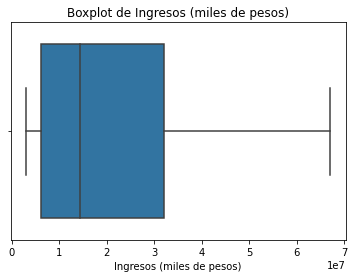

In [43]:
## Hago un gráfico de cajas para ver si hay outliers

import seaborn as sns

# Boxplot para Ingresos (miles de pesos)
sns.boxplot(x=df3['Ingresos (miles de pesos)'])
plt.xlabel('Ingresos (miles de pesos)')
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.show()

#### Vemos que no hay valores atípicos

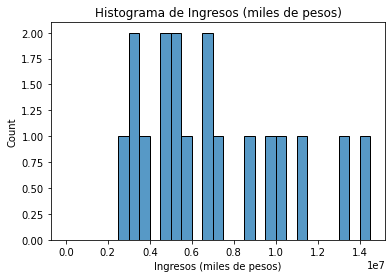

In [68]:
import seaborn as sns
## Realizamos el histograma con bins personalizados
sns.histplot(data=df3, x= 'Ingresos (miles de pesos)', bins = np.arange(0,15000000,500000))
plt.xlabel('Ingresos (miles de pesos)')
plt.title('Histograma de Ingresos (miles de pesos)')
plt.show()

### Vemos en el histograma varios picos que nos indica el mayor número de ocurrencias  y el resto en meseta, con barras de la misma altura que nos indica, que hay varias distribuciones juntas con diferentes medidas

In [70]:
## Hacemos una tabla pivot para poder obtener algunas conclusiones. 

pv2 = pd.pivot_table(df3, index=['Trimestre','Año'], values=['Ingresos (miles de pesos)'], aggfunc='mean')
pv2

Ingresos (miles de pesos)
Trimestre Año                            
1         2014                  2984054.0
          2015                  4876385.0
          2016                  5936845.0
          2017                  8701201.0
          2018                 13171459.0
          2019                 20207414.0
          2020                 29946216.0
          2021                 36676371.0
          2022                 55589997.0
2         2014                  3270816.0
          2015                  4701791.0
          2016                  6534241.0
          2017                  9678647.0
          2018                 14319467.0
          2019                 20743118.0
          2020                 32102476.0
          2021                 38239667.0
          2022                 60335724.0
3         2014                  3478638.0
          2015                  5153739.0
          2016                  6912442.0
          2017                 10065998.0
          2018                 15410981.0
          2019                 21652748.0
          2020                 31997445.0
          2021                 42999944.0
          2022                 67055930.0
4         2014                  3950441.0
          2015                  5376899.0
          2016                  7483980.0
          2017                 11226127.0
          2018                 16637687.0
          2019                 24169251.0
          2020                 33539703.0
          2021                 45467887.0

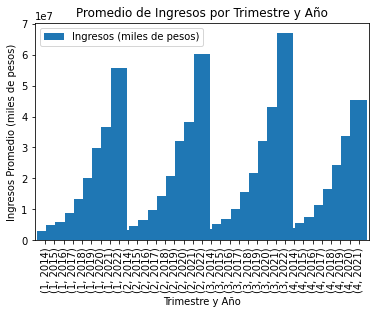

In [71]:
## Hacemos una gráfica de esta tabla pivot, teniendo en cuenta los ingresos en los diferentes trimestre del año.


pv2.plot.bar(width=1.8) 
plt.xlabel('Trimestre y Año')
plt.ylabel('Ingresos Promedio (miles de pesos)')
plt.title('Promedio de Ingresos por Trimestre y Año')

plt.show()



#### Concluimos que ha ido en aumento los ingresos en el curso del tiempo, llegando a un pico en el año 2022 sobre todo en el tercer trimestre.

In [72]:
## Exportamos el archivo lugo de su anális.

df3.to_csv('df3_eda_ingresos.csv')

### Continuaremos con el análisis de dos csv de internet en hogares. Uno por cada 100 hogares, por provincia, trimestral y un segundo csv a nivel nacional con acceso por cada 100 hogares y por cada 100 habitantes.

In [2]:
## Cargamos el csv
df4 = pd.read_csv(r'C:\Users\Rossella\Escritorio\PROYECTO2\Internet_hogares\Internet__cada_100_hogares.csv',keep_default_na=False)

In [3]:
## Cargamos las primeras filas del csv
df4.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [4]:
## Vemos la primera info del csv, tipos de datos, columnas y filas. 
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [5]:
## Realizare antes de cambiar el tipo de dato algunas correcciones que hay en el csv. He decidido redondear los valores de la columna 'Acceso 
## por cada 100 hogares' para un mejor análisis.

import re

# Verifico columnas numéricas válidas
columnas_numericas = ['Accesos por cada 100 hogares']

# Corrijo los formatos incorrectos en las columnas numéricas
for columna in columnas_numericas:
    df4[columna] = df4[columna].astype(str).str.replace('.', '', regex=False)
    df4[columna] = df4[columna].str.replace(',', '.')  # Reemplazo la coma decimal por un punto
    df4[columna] = df4[columna].apply(lambda x: re.sub(r'[^0-9.]', '', x))
    df4[columna] = pd.to_numeric(df4[columna], errors='coerce')
    df4[columna] = df4[columna].round().astype(int)

In [6]:
df4.head(1)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78


In [7]:
## Confirmo que el cambio se haya realizado correctamente
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 23.1+ KB


In [8]:
df4.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78
1,2022,3,Capital Federal,122
2,2022,3,Catamarca,65
3,2022,3,Chaco,44
4,2022,3,Chubut,84


In [9]:
## Hago un primer estudio estadístico de las variables numéricas.

df4.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.064286
std,2.528745,1.105009,23.139741
min,2014.000000,1.000000,9.000000
25%,2016.000000,1.000000,32.000000
50%,2018.000000,2.000000,46.000000
75%,2020.000000,3.000000,62.000000
max,2022.000000,4.000000,124.000000


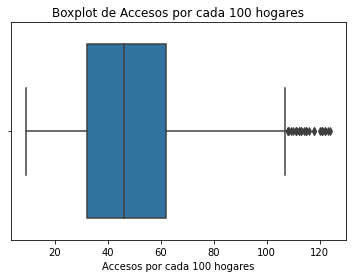

In [10]:
## Observamos los outliers

import seaborn as sns

# Boxplot para Ingresos (miles de pesos)
sns.boxplot(x=df4['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Boxplot de Accesos por cada 100 hogares')
plt.show()

#### Vemos algunos valores por encima de los valores estipulados, pero debemos tener en cuenta que estos accesos a internet varían según las provincias, en las cuales haya acceso al internet y también influye mucho la parte económica del cliente.Entonces si podemos tener valores fuera del rango, pero que no sean considerados outliers.

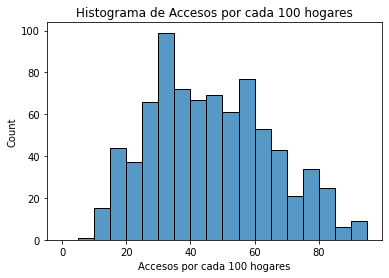

In [11]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df4, x= 'Accesos por cada 100 hogares', bins=np.arange(0,100,5))
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Histograma de Accesos por cada 100 hogares')
plt.show()

#### vemos en el histograma un pico, no está centrado en la media, ya que vrmos luego a su alrededor sobre todo a la derecha unas barras muy parecids que recuerdan a un formato de meseta, lo cual ocurre cuando hay varias distribuciones juntas con diferentes medias.

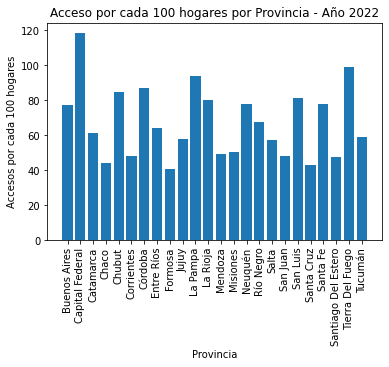

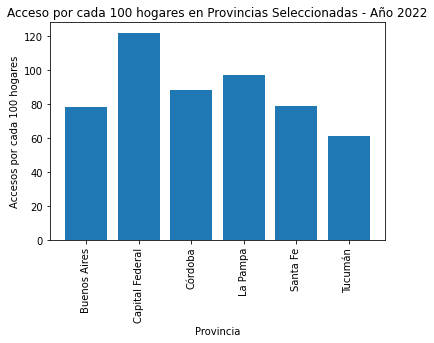

In [13]:

# Filtra los datos para el año 2022
df4_2022 = df4[df4['Año'] == 2022]

# Gráfico de acceso por cada 100 hogares por provincia en el año 2022
df4_por_provincia = df4_2022.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

plt.bar(df4_por_provincia.index, df4_por_provincia)
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Acceso por cada 100 hogares por Provincia - Año 2022')
plt.xticks(rotation=90)
plt.show()

# Gráfico de acceso por cada 100 hogares en las provincias seleccionadas en el año 2022
provincias_seleccionadas = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'La Pampa', 'Santa Fe', 'Tucumán']
df_seleccionadas = df4_2022[df4_2022['Provincia'].isin(provincias_seleccionadas)]

plt.bar(df_seleccionadas['Provincia'], df_seleccionadas['Accesos por cada 100 hogares'])
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Acceso por cada 100 hogares en Provincias Seleccionadas - Año 2022')
plt.xticks(rotation=90)
plt.show()

#### He hecho la comparaación para 100 hogares de las mismas provincias analizadas en tecnologías. Y vemos que en cada 100 hogares y tomando en cuanta todas las tecnologías de internet, no se notan tantas diferencias, salvo Capital Federal que es la que va a la vanguardia en el acceso en internet cada 100 hogares.

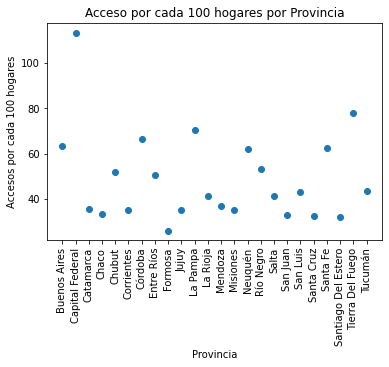

In [143]:
# Gráfico de dispersión de acceso por cada 100 hogares por provincia
df4_por_provincia = df4.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

plt.scatter(df4_por_provincia.index, df4_por_provincia)
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Acceso por cada 100 hogares por Provincia')
plt.xticks(rotation=90)
plt.show()

#### Creo un diagrama de dispersión de todas las provincias con respecto a accesos a internet cada 100 hogares y podemos apreciar que hay muchas provincias con varlores muy bajos. 

In [20]:
## Creo una tabla pivot solo con Provincia
pv3 = pd.pivot_table(df4, index=['Provincia'], values=['Accesos por cada 100 hogares'], aggfunc='mean')
pv3

,Accesos por cada 100 hogares
Provincia,
Buenos Aires,63.571429
Capital Federal,113.314286
Catamarca,35.857143
Chaco,33.228571
Chubut,52.171429
Corrientes,35.200000
Córdoba,66.371429
Entre Ríos,50.771429
Formosa,26.142857


In [16]:
## Otra tabla pivot para valorar el acceso en los distintos trimestres de los años. 
pv3 = pd.pivot_table(df4, index=['Provincia', 'Año','Trimestre'], values=['Accesos por cada 100 hogares'], aggfunc='mean')
pv3

Accesos por cada 100 hogares
Provincia    Año  Trimestre                              
Buenos Aires 2014 1                                    55
                  2                                    55
                  3                                    57
                  4                                    56
             2015 1                                    56
...                                                   ...
Tucumán      2021 3                                    55
                  4                                    56
             2022 1                                    57
                  2                                    59
                  3                                    61

[840 rows x 1 columns]

#### Para esta tabla pivot, al tener tanto datos, será representada  en el dashboad que crearemos, para poder hacer filtrados y poder apreciar mejor los resultados y obtener algunas conclusiones de los mismos






In [19]:
## Exportamos el csv
df4.to_csv('Internet_cada_cien_hogares.csv')

### Continuando con el análisis de los csv, pasaremos a los datos del histórico de velocidad media de internet por provincia, año y trimestre

In [3]:
## Leemos el csv
df5 = pd.read_csv(r'C:\Users\Rossella\Escritorio\PROYECTO DA TELECOMUNICACIONES\DATASETS\historico_velocidad_media_internet_fijo_provincia.csv')

In [4]:
## Cargamos primeras filas del csv
df5.head(3)

,Anio,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61


In [5]:
## Primea información del csv , sus filas y columnas y tipo de datos. 
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Anio                    840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


#### Vemos en la info que no nesesitamos convertir ninguno de los datos del csv.

In [6]:
## Hago un primer análsis estadístico de los datos

df5.describe()

,Anio,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.791667
std,2.528745,1.105009,14.631286
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,4.000000
50%,2018.000000,2.000000,7.000000
75%,2020.000000,3.000000,18.000000
max,2022.000000,4.000000,101.000000


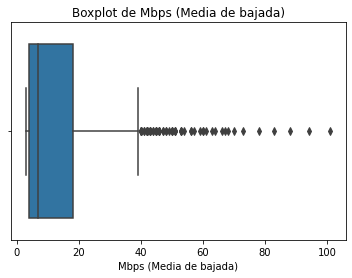

In [7]:
## Hago un gráfico de cajas para poder apreciar outliers

import seaborn as sns

# Boxplot para Mbps
sns.boxplot(x=df5['Mbps (Media de bajada)'])
plt.xlabel('Mbps (Media de bajada)')
plt.title('Boxplot de Mbps (Media de bajada)')
plt.show()


#### En este gráfico de caja vemos varios valores que parecen outliers por encima del valor límite del gráfico, pero en este caso al tener esos valores de media de bajada significa que en zonas tiene una velocidad de descarga y de recibir los datos del servidor más rápido. En este caso no los consideramos outliers.

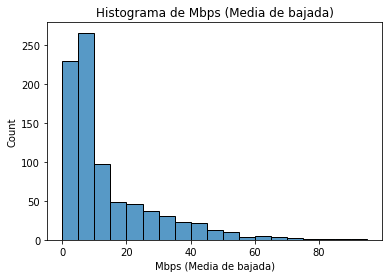

In [8]:
## Realizamos el histograma con bins personalizados
sns.histplot(data=df5, x= 'Mbps (Media de bajada)', bins=np.arange(0,100,5))
plt.xlabel('Mbps (Media de bajada)')
plt.title('Histograma de Mbps (Media de bajada)')
plt.show()

#### En este histograma podemos identificar que está sesgado hacia la derecha. Esto nos indica que la mayor parte de la concentración de datos se encuentra al comienzo de la distribución. El sesgo hacia la derecha, es cuando la distribución de datos indica que los valores altos ocurren con baja frecuencia.

In [9]:
## Creo una tabla pivot

pv4 = pd.pivot_table(df5, index=['Provincia', 'Anio','Trimestre'], values=['Mbps (Media de bajada)'], aggfunc='mean')
pv4

Mbps (Media de bajada)
Provincia    Anio Trimestre                        
Buenos Aires 2014 1                               4
                  2                               4
                  3                               4
                  4                               4
             2015 1                               4
...                                             ...
Tucumán      2021 2                              40
                  3                              42
                  4                              45
             2022 1                              47
                  2                              50

[840 rows x 1 columns]

#### Veremos gráficamente los Mbps de cada provincia por trimestre

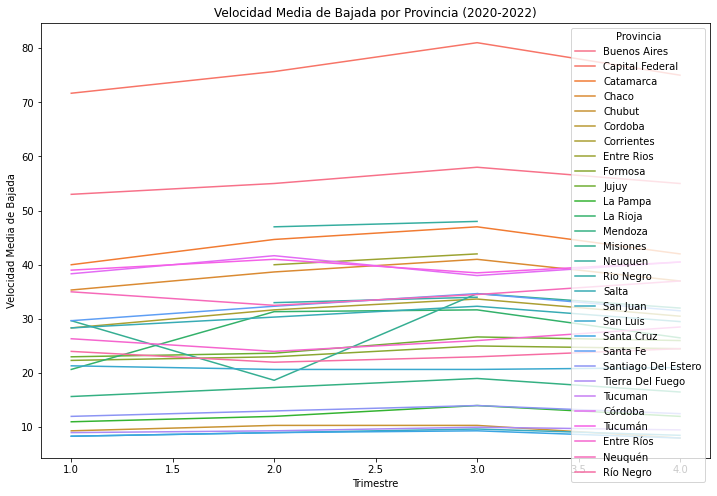

In [13]:
# Filtro los datos para el rango de trimestres y años específico
trimestres = [1, 2, 3, 4]
anios = [2020, 2021, 2022]
df5_filtrado = df5[(df5['Trimestre'].isin(trimestres)) & (df5['Anio'].isin(anios))]

# Creo la gráfica utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5_filtrado, x='Trimestre', y='Mbps (Media de bajada)', hue='Provincia', ci=None)

# Configuro el título y las etiquetas de los ejes
plt.title('Velocidad Media de Bajada por Provincia (2020-2022)')
plt.xlabel('Trimestre')
plt.ylabel('Velocidad Media de Bajada')

# Muestro la leyenda
plt.legend(title='Provincia', loc='upper right')

# Muestro la gráfica
plt.show()

#### No he creado gráficas ya que son muchos datos y en el dashboard volcaré todos estos datos para poder interactuar con los mismos y sacar conclusiones sobre por ejemplo el promedio de Mbps  por provincia  o Provincia con la velocidad de descarga más baja. 

In [ ]:
## Exportamos el csv
df5.to_csv('historico_velocidad_media_provincia.csv')

### Cargaré un csv con las provincias con sus latitudes y longitudes para una análisis más claro en las visualizaciones. El archivo fue descargado de la web https://datos.gob.ar/
#### En el análisis de este csv, solo tendré en cuenta el tipo de dato, si hay nulos y duplicados, ya que es un complemento para para poder hacer un uso de las provincias adecuado.

In [2]:
df6 = pd.read_csv(r'C:\Users\Rossella\Escritorio\PROYECTO DA TELECOMUNICACIONES\Provincias\provincias.csv')

In [3]:
df6.head(3)

,categoria,centroide_lat,centroide_lon,fuente,id,iso_id,iso_nombre,nombre,nombre_completo
0,Provincia,-26.875397,-54.651697,IGN,54,AR-N,Misiones,Misiones,Provincia de Misiones
1,Provincia,-33.757726,-66.028130,IGN,74,AR-D,San Luis,San Luis,Provincia de San Luis
2,Provincia,-30.865368,-68.889491,IGN,70,AR-J,San Juan,San Juan,Provincia de San Juan


In [5]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   categoria        24 non-null     object 
 1   centroide_lat    24 non-null     float64
 2   centroide_lon    24 non-null     float64
 3   fuente           24 non-null     object 
 4   id               24 non-null     int64  
 5   iso_id           24 non-null     object 
 6   iso_nombre       24 non-null     object 
 7   nombre           24 non-null     object 
 8   nombre_completo  24 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ KB


#### Al ver que no hay nulos y el tipo de dato es correcto, lo cargaré en power bi, donde eliminaré algunas columnas que no son necesarias y corregiré algunos nombres.

In [ ]:
df6.to_csv('provincias_argentinas.csv')